In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop('id', axis='columns', inplace=True)

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
import numpy as np
bmi_mean = np.mean(df.bmi)
bmi_mean

28.893236911794673

In [8]:
df.fillna(bmi_mean, inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
df1=df.apply(LabelEncoder().fit_transform)

In [16]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
items = ['age','avg_glucose_level','bmi']
df1[items] = scaler.fit_transform(df[items])

In [18]:
df1.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4284,1,0.841309,1,1,1,2,1,0.106131,0.279496,1,0
756,0,0.218750,0,0,0,2,0,0.340920,0.151203,0,0
1347,1,0.865723,0,0,1,2,1,0.139461,0.199313,2,0
2548,1,0.584961,1,0,1,2,1,0.544825,0.305842,3,0
2719,1,0.633789,0,0,0,0,0,0.081202,0.304696,1,0


In [19]:
corr = df.corr()
corr['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

In [20]:
df1.stroke.unique()

array([1, 0], dtype=int64)

In [39]:
X = df1.drop('stroke', axis='columns')
y = df1.stroke

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [55]:
X_train.shape

(4088, 10)

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.2256 - accuracy: 0.9447
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9503
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 0.9503
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.9503
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9503: 0s - loss: 0.1875 - accu
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9503
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9503
Epoch 8/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9503
Epoch 9/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9503
Epoch 10/100
128/128 [==============================] - 0s 3ms/st

128/128 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9528
Epoch 82/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9530
Epoch 83/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1425 - accuracy: 0.9523
Epoch 84/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9518
Epoch 85/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9540
Epoch 86/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.9525
Epoch 87/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9528
Epoch 88/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1444 - accuracy: 0.9523
Epoch 89/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9533
Epoch 90/100
128/128 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 

In [58]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9530


[0.21538010239601135, 0.9530332684516907]

In [59]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.09094986],
       [0.01130018],
       [0.00061113],
       [0.00867406],
       [0.00354898]], dtype=float32)

In [60]:
y_predicted = []
for i in y_pred:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [61]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

In [62]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Text(69.0, 0.5, 'Truth')

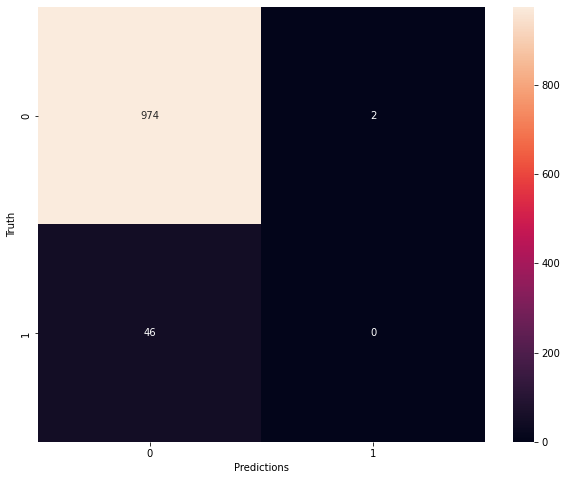

In [63]:
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")